# Stock vs Index hurst index estimation - Log S-fbm model

### Done by : Othmane ZARHALI

# Importations

In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/othmane/Desktop/MyPhD/Numerics/Indices vs stocks hurst index GMM estimates/Indices vs stocks hurst index GMM estimates - Codes"))

import matplotlib.pyplot as plt
from math import log
import warnings
warnings.filterwarnings("ignore")

from DataAcquisition import *
from GMMCalibration import *
from LogSfbmModel import *

# Oxford Man institute realized volatility acquisition

In [2]:
File_path = "/Users/othmane/Desktop/MyPhD/Numerics/Indices vs stocks hurst index GMM estimates/Indices vs stocks hurst index GMM estimates - Codes/oxfordmanrealizedvolatilityindices.csv"
realized_vol_data_obj_ox = DataAcquisition('OxfordManInstitute',File_path)

In [3]:
realized_vol_data_obj_ox.IndicesCharging()
indices_list = realized_vol_data_obj_ox.indices_list
vol_dataset = realized_vol_data_obj_ox.dataframe_indices
print(vol_dataset)

         index                 Unnamed: 0 Symbol  close_time  rk_parzen  \
0            0  2000-01-03 00:00:00+00:00   .AEX    163015.0   0.000179   
1            1  2000-01-04 00:00:00+00:00   .AEX    163016.0   0.000423   
2            2  2000-01-05 00:00:00+00:00   .AEX    163016.0   0.000324   
3            3  2000-01-06 00:00:00+00:00   .AEX    163002.0   0.000219   
4            4  2000-01-07 00:00:00+00:00   .AEX    163016.0   0.000155   
...        ...                        ...    ...         ...        ...   
139940  145271  2021-04-05 00:00:00+01:00   .STI    180000.0   0.000004   
139941  145272  2021-04-06 00:00:00+01:00   .STI    180000.0   0.000024   
139942  145273  2021-04-07 00:00:00+01:00   .STI    180000.0   0.000013   
139943  145274  2021-04-08 00:00:00+01:00   .STI    175959.0   0.000009   
139944  145275  2021-04-09 00:00:00+01:00   .STI    180000.0   0.000006   

        open_time  open_price     medrv       rv5        bv  ...    rk_th2  \
0         90101.0    

Indices available

In [4]:
indices_list

['.AEX',
 '.AORD',
 '.BFX',
 '.BSESN',
 '.BVLG',
 '.BVSP',
 '.DJI',
 '.FCHI',
 '.FTMIB',
 '.FTSE',
 '.GDAXI',
 '.GSPTSE',
 '.HSI',
 '.IBEX',
 '.IXIC',
 '.KS11',
 '.KSE',
 '.MXX',
 '.N225',
 '.NSEI',
 '.OMXC20',
 '.OMXHPI',
 '.OMXSPI',
 '.OSEAX',
 '.RUT',
 '.SMSI',
 '.SSEC',
 '.SSMI',
 '.STI']

##### Log vol computation

##### Let's consider two indices : NSEI and STI

In [5]:
log_vols_NSEI = realized_vol_data_obj_ox.GetlogVol(".NSEI",'bv',True,True,False,0,0)
log_vols_STI = realized_vol_data_obj_ox.GetlogVol(".STI",'bv',True,True,False,0,0)
print(log_vols_NSEI,log_vols_STI)

[ -9.09583846  -8.42565538  -8.41514315 ...  -9.20799311 -10.37571292
 -11.10107484] [-10.85806965 -10.23129018  -9.93152778 ...  -9.97600644  -9.8917955
  -9.86773188]


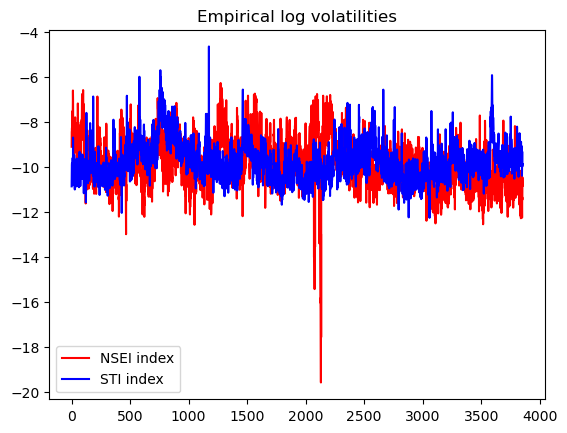

In [6]:
min_length = min(len(log_vols_NSEI),len(log_vols_STI))
time_line = np.arange(min_length)
plt.plot(time_line,log_vols_NSEI[:min_length], color='red',label='NSEI index')
plt.plot(time_line,log_vols_STI[:min_length], color='blue',label='STI index')

plt.title("Empirical log volatilities")
plt.legend()
plt.show()

##### Log vol statistics

##### Numerical tests -  NSEI

In [7]:
# NSEI
logvolvariance_overall_with_lag_NSEI = realized_vol_data_obj_ox.GetlogVolVar_vs_Size(log_vols_NSEI)
print(logvolvariance_overall_with_lag_NSEI)

(array([   8,    9,   12,   14,   18,   22,   28,   34,   42,   52,   64,
         79,   98,  120,  148,  183,  226,  278,  343,  422,  521,  642,
        791,  975, 1201, 1480, 1824, 2248, 2770, 3413, 4206, 5183]), array([0.35842535, 0.37524941, 0.41599062, 0.4381994 , 0.47550027,
       0.50773756, 0.54964531, 0.58411015, 0.62014323, 0.65322222,
       0.6802255 , 0.7074864 , 0.73739737, 0.76633661, 0.79322425,
       0.81666472, 0.83875362, 0.86066882, 0.87920371, 0.89422324,
       0.9089994 , 0.92457659, 0.93926288, 0.95923213, 0.98452674,
       1.01168093, 1.04670444, 1.09140392, 1.13095154, 1.16028133,
       1.13001706,        nan]))


In [8]:
means_and_variance_eachday_in_week = realized_vol_data_obj_ox.ComputeMeanVarianceinWeek('.NSEI')
print(means_and_variance_eachday_in_week)

(array([-9.05457534, -8.70085103, -9.18843551, -9.21880093, -9.81530079]), array([0.78077038, 1.53100143, 0.56212798, 0.51751696, 0.01510113]))


In [9]:
correl = Correlation(log_vols_NSEI,log_vols_NSEI)
print(correl)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([1.08385978, 0.78083193, 0.701292  , 0.65365305, 0.61472904,
       0.61077713, 0.55307408, 0.52553815, 0.49779351, 0.49031727,
       0.49593499, 0.45630645, 0.43516446, 0.43246381, 0.41850497,
       0.409631  , 0.37083193, 0.34827862, 0.34972304, 0.33220779,
       0.31701237, 0.28914225, 0.28188284, 0.28132966, 0.28327881,
       0.27685011, 0.26077149, 0.25676326, 0.25973784, 0.2636926 ,
       0.25447167, 0.24994179, 0.2480732 , 0.25472634, 0.25905081,
       0.25614122, 0.24835241, 0.25703416, 0.24836318, 0.25128471,
       0.24110904, 0.23756706, 0.24073382, 0.25230844, 0.26547803,
       0.26772659, 0.26084441, 0.26888187, 0.28068201, 0.26864436,
       0.28446571]))


##### Numerical tests -  STI

In [10]:
# STI
logvolvariance_overall_with_lag_STI = realized_vol_data_obj_ox.GetlogVolVar_vs_Size(log_vols_STI)
print(logvolvariance_overall_with_lag_STI)

(array([   8,    9,   11,   14,   17,   21,   26,   32,   39,   48,   58,
         71,   87,  106,  130,  158,  193,  236,  288,  352,  430,  525,
        641,  782,  955, 1165, 1422, 1736, 2119, 2587, 3157, 3854]), array([0.18273815, 0.18972343, 0.20144343, 0.21593706, 0.22769403,
       0.24095312, 0.25510806, 0.26978724, 0.28439693, 0.30015858,
       0.31527965, 0.33189439, 0.34916642, 0.36677116, 0.38499093,
       0.40253773, 0.42001739, 0.43867449, 0.45920557, 0.48098552,
       0.5068847 , 0.53854361, 0.57256764, 0.60256036, 0.60940972,
       0.61395769, 0.62028397, 0.62769465, 0.63290987, 0.6567422 ,
       0.69929094,        nan]))


In [11]:
means_and_variance_eachday_in_week = realized_vol_data_obj_ox.ComputeMeanVarianceinWeek(".STI")
print(means_and_variance_eachday_in_week)

(array([-10.85806965, -10.23129018,  -9.93152778,  -9.82895074,
       -10.09268284]), array([1.15224036, 0.19949187, 0.02157454, 0.00196299, 0.09488728]))


In [12]:
correl = Correlation(log_vols_STI,log_vols_STI)
print(correl)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([0.65945294, 0.49742405, 0.45827235, 0.44268707, 0.42729325,
       0.42060089, 0.40239439, 0.39835343, 0.39364837, 0.38300065,
       0.38237012, 0.36583987, 0.35021808, 0.35613399, 0.35539619,
       0.34918668, 0.3409036 , 0.33442755, 0.32939468, 0.32731938,
       0.32173866, 0.31295264, 0.31003246, 0.30617113, 0.30392936,
       0.30272755, 0.29056251, 0.2869957 , 0.28180388, 0.27833755,
       0.27958174, 0.27724508, 0.27578545, 0.26964285, 0.27446028,
       0.28156098, 0.2679243 , 0.26988708, 0.26415253, 0.26117487,
       0.26394733, 0.2579122 , 0.25592286, 0.24922336, 0.24350831,
       0.25146695, 0.24683316, 0.23884517, 0.23807632, 0.2312326 ,
       0.23689783]))


# Yahoo finance data acquisition

##### Log vol computation

##### Let's consider two stocks : GOOGL and AMZN

##### GOOGL

In [13]:
realized_vol_data_obj_yf_GOOGL = DataAcquisition('Yahoo finance')

In [14]:
realized_vol_data_obj_yf_GOOGL.IndicesCharging("GOOGL",first_date="1900-01-01",last_date="2034-01-01")
market_data_GOOGL = realized_vol_data_obj_yf_GOOGL.dataframe_indices

[*********************100%***********************]  1 of 1 completed


In [15]:
market_data_GOOGL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2022-11-02,90.940002,91.180000,86.879997,86.970001,86.970001,57038300
2022-11-03,86.320000,86.519997,83.339996,83.430000,83.430000,61288000
2022-11-04,85.400002,86.639999,83.709999,86.580002,86.580002,51105600


In [16]:
market_capitalization_GOOGL = realized_vol_data_obj_yf_GOOGL.market_capitalization

In [17]:
signal_test_GOOGL = market_data_GOOGL["Close"]

In [18]:
removed0signal_test_GOOGL = realized_vol_data_obj_yf_GOOGL.removeZeros(np.array(signal_test_GOOGL))
log_vol_estimator_GOOGL = realized_vol_data_obj_yf_GOOGL.ComputeLogVolEstimator()

##### AMZN

In [19]:
realized_vol_data_obj_yf_AMZN = DataAcquisition('Yahoo finance')

In [20]:
realized_vol_data_obj_yf_AMZN.IndicesCharging("AMZN",first_date="1900-01-01",last_date="2034-01-01")
market_data_AMZN = realized_vol_data_obj_yf_AMZN.dataframe_indices

[*********************100%***********************]  1 of 1 completed


In [21]:
market_data_AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2022-11-02,97.320000,97.739998,92.010002,92.120003,92.120003,135761800
2022-11-03,92.470001,93.500000,89.019997,89.300003,89.300003,136683300
2022-11-04,91.489998,92.440002,88.040001,90.980003,90.980003,128999900


In [22]:
market_capitalization_AMZN = realized_vol_data_obj_yf_AMZN.market_capitalization

In [23]:
signal_test_AMZN = market_data_AMZN["Close"]

In [24]:
removed0signal_test_AMZN = realized_vol_data_obj_yf_AMZN.removeZeros(np.array(signal_test_AMZN))
log_vol_estimator_AMZN = realized_vol_data_obj_yf_AMZN.ComputeLogVolEstimator()

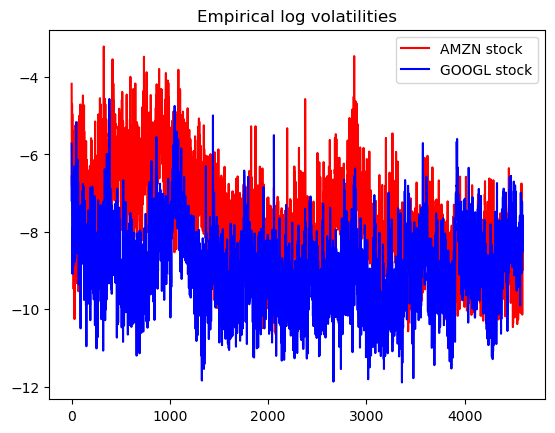

In [25]:
min_length = min(len(log_vol_estimator_AMZN),len(log_vol_estimator_GOOGL))
time_line = np.arange(min_length)
plt.plot(time_line,log_vol_estimator_AMZN[:min_length], color='red',label='AMZN stock')
plt.plot(time_line,log_vol_estimator_GOOGL[:min_length], color='blue',label='GOOGL stock')

plt.title("Empirical log volatilities")
plt.legend()
plt.show()

# GMM Calibration

In [26]:
GMM_obj = GMM()

### GMM on indices

##### NSEI

*******************************
res =        fun: 0.014382097864422329
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.56943514e-05, -5.20417046e-10,  8.67361738e-10])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 4556
      nit: 416
     njev: 1139
   status: 0
  success: True
        x: array([-5.1770887 , -1.84065629,  0.06167522])
*******************************
Objective function value after calibration =  0.005105415981393452


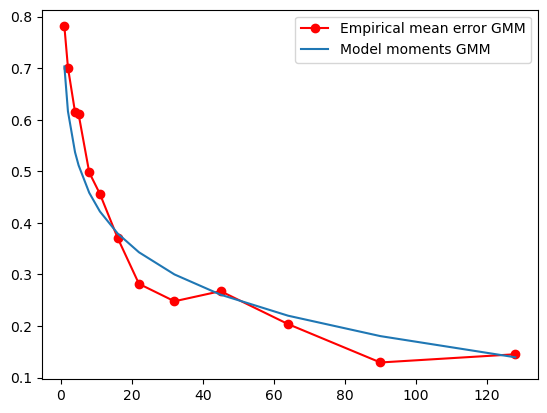

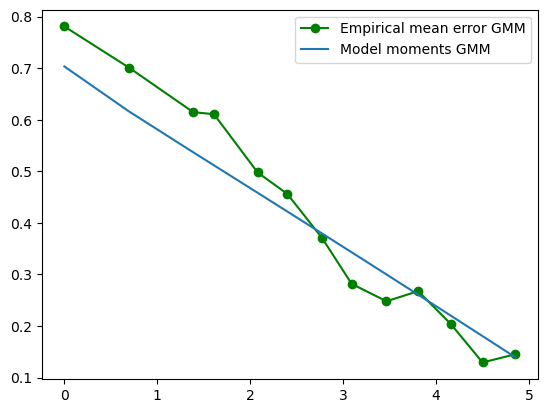

H =  0.005582377919682376 lambda2 = 0.10935691633908327 T =  1.0697488753025635 lsigma2 = 4.5399929762484854e-05 p-Value=  0.003166796958927884 J =  26.46137103156232 J_95 =  18.30703805327515
------------------------------------------------------


(0.005582377919682376,
 0.10935691633908327,
 1.0697488753025635,
 4.5399929762484854e-05,
 0.003166796958927884,
 26.46137103156232,
 18.30703805327515,
 [array([0.78083193, 0.701292  , 0.61472904, 0.61077713, 0.49779351,
         0.45630645, 0.37083193, 0.28188284, 0.2480732 , 0.26772659,
         0.203828  , 0.12942438, 0.14536152]),
  array([0.70328145, 0.61635971, 0.53697281, 0.51166717, 0.45837923,
         0.42220084, 0.37950863, 0.34310116, 0.30010809, 0.26083772,
         0.22011149, 0.18053947, 0.13949864]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [27]:
calibrated_parameters_NSEI = GMM_obj.ComputeParamsGMM(log_vols_NSEI)
calibrated_parameters_NSEI

##### STI

*******************************
res =        fun: 0.000385662821968008
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.49464860e-06, -3.66276022e-07, -6.38367401e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 464
      nit: 41
     njev: 116
   status: 2
  success: False
        x: array([-2.28268463, -3.30107914,  1.13269762])
*******************************
Objective function value after calibration =  0.0011198642548073128


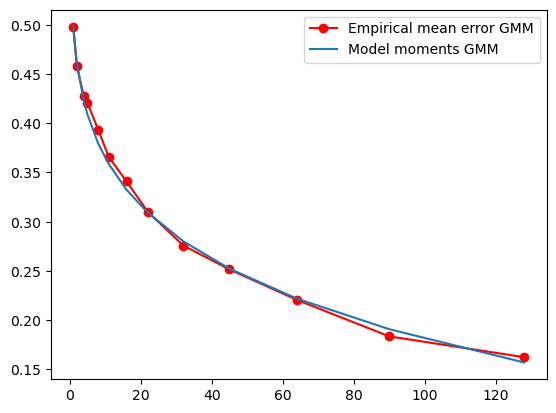

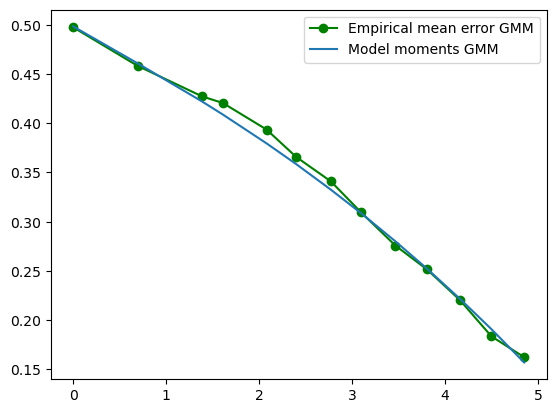

H =  0.076972167347693 lambda2 = 0.03952835398816385 T =  2.6278243571722353 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9319700526550283 J =  4.315956838027383 J_95 =  18.30703805327515
------------------------------------------------------


(0.076972167347693,
 0.03952835398816385,
 2.6278243571722353,
 4.5399929762484854e-05,
 0.9319700526550283,
 4.315956838027383,
 18.30703805327515,
 [array([0.49742405, 0.45827235, 0.42729325, 0.42060089, 0.39364837,
         0.36583987, 0.3409036 , 0.31003246, 0.27578545, 0.25146695,
         0.22053445, 0.18351524, 0.16235613]),
  array([0.49831654, 0.46081518, 0.42208908, 0.40887157, 0.37959705,
         0.35856292, 0.33247639, 0.3091001 , 0.2800925 , 0.25220777,
         0.22182169, 0.19079908, 0.15699248]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [28]:
calibrated_parameters_STI = GMM_obj.ComputeParamsGMM(log_vols_STI)
calibrated_parameters_STI

### GMM on stocks

##### GOOGL

*******************************
res =        fun: 0.0006570845093599535
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.44455846e-06, -8.21066310e-08, -2.44075595e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 448
      nit: 37
     njev: 112
   status: 2
  success: False
        x: array([-2.19662495, -3.00913488,  1.14470462])
*******************************
Objective function value after calibration =  0.0012664878665839664


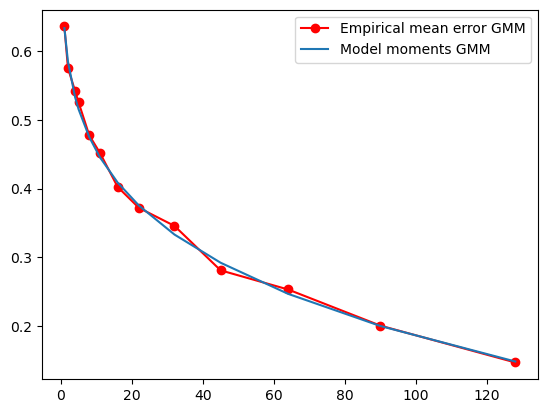

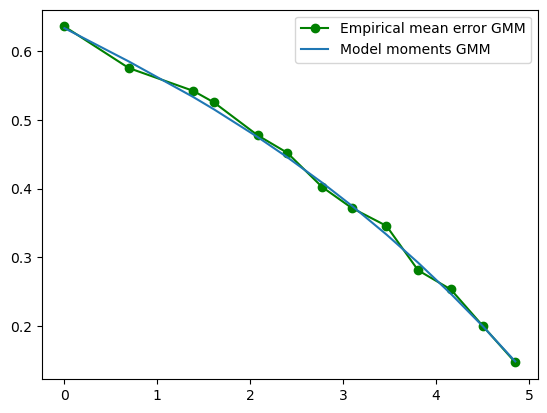

H =  0.09540968183051254 lambda2 = 0.048596935522216334 T =  2.996218133655504 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8308101334707606 J =  5.811912819753822 J_95 =  18.30703805327515
------------------------------------------------------


(0.09540968183051254,
 0.048596935522216334,
 2.996218133655504,
 4.5399929762484854e-05,
 0.8308101334707606,
 5.811912819753822,
 18.30703805327515,
 [array([0.63586222, 0.57541457, 0.54222125, 0.52538599, 0.47758875,
         0.45218101, 0.40248832, 0.37201321, 0.34583264, 0.28119934,
         0.25335435, 0.20077579, 0.14720013]),
  array([0.6334882 , 0.58497605, 0.5332997 , 0.51535154, 0.47507631,
         0.44571256, 0.40882474, 0.37534408, 0.33326223, 0.29227236,
         0.24703074, 0.20024743, 0.14860979]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [29]:
calibrated_parameters_GOOGL = GMM_obj.ComputeParamsGMM(log_vol_estimator_GOOGL)
calibrated_parameters_GOOGL

##### AMZN

*******************************
res =        fun: 0.0007177303983763245
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.94221333e-06, 7.46906881e-08, 2.86381160e-07])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 936
      nit: 147
     njev: 234
   status: 0
  success: True
        x: array([-3.11192709, -2.710575  ,  0.98623026])
*******************************
Objective function value after calibration =  0.0007433060531998198


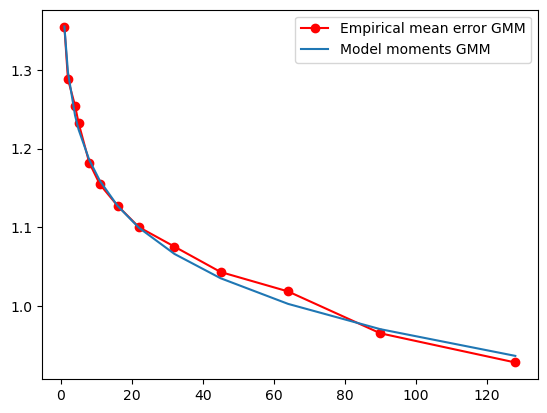

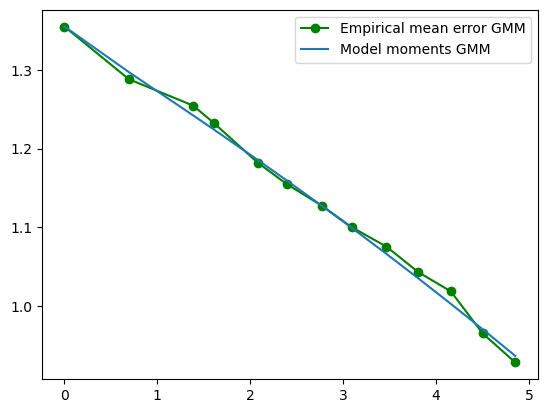

H =  0.029279936953710957 lambda2 = 0.06898197479228908 T =  2.0769555727800633 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9061080950471897 J =  4.7683083312768435 J_95 =  18.30703805327515
------------------------------------------------------


(0.029279936953710957,
 0.06898197479228908,
 2.0769555727800633,
 4.5399929762484854e-05,
 0.9061080950471897,
 4.7683083312768435,
 18.30703805327515,
 [array([1.35512682, 1.28821923, 1.2545646 , 1.23238766, 1.18212638,
         1.15437929, 1.12717072, 1.10003365, 1.07527391, 1.04300478,
         1.01831907, 0.96505564, 0.92797675]),
  array([1.35523446, 1.29727779, 1.24211634, 1.22412712, 1.18560653,
         1.15895658, 1.12698522, 1.09926802, 1.06599436, 1.03508184,
         1.0024922 , 0.97030171, 0.93636339]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [30]:
calibrated_parameters_AMZN = GMM_obj.ComputeParamsGMM(log_vol_estimator_AMZN)
calibrated_parameters_AMZN

### Multiple Stock and indices calibration

### Indices

In [31]:
Indices_test_symbols = ['.AEX','.AORD','.BFX', '.BSESN']

In [32]:
logvol_synthesis_ox = realized_vol_data_obj_ox.LogVolSynthesisOverAssets(Indices_test_symbols)
logvol_synthesis_ox

{'.AEX': array([ -9.363648  ,  -9.2829408 ,  -9.50419861, ..., -10.49494979,
        -10.66919384, -10.78024093]),
 '.AORD': array([ -9.810457  , -10.30105542,  -9.36433307, ...,  -9.88412876,
        -10.28379873, -11.13394767]),
 '.BFX': array([ -9.71483899, -10.46947439, -10.05192215, ..., -10.47888137,
        -10.44993989, -11.10387582]),
 '.BSESN': array([ -8.93322485,  -8.79850441,  -8.76741764, ..., -10.37471496,
        -10.16140705, -10.44435716])}

In [33]:
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_ox)

*******************************
res =        fun: 0.0016549759696170706
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.87337126e-06, -2.40259203e-08, -1.41813645e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 328
      nit: 30
     njev: 82
   status: 2
  success: False
        x: array([-1.89693078, -3.12313319,  1.65009417])
*******************************
Objective function value after calibration =  0.0032210815825349814
H =  0.14739455949502311 lambda2 = 0.0347887316215732 T =  6.330691784202852 lsigma2 = 4.5399929762484854e-05 p-Value=  0.08794816830091372 J =  16.43073715245563 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0012374783836065658
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.49782793e-07, 4.35632436e-08, 7.58724685e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 404
      nit: 33
     njev: 101


,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,.AEX,0.147395,0.034789,6.330692,0.000045,0.087948,16.430737,18.307038
1,.AORD,0.190438,0.017229,10.211014,0.000045,0.535038,8.969106,18.307038
2,.BFX,0.136594,0.031163,5.574426,0.000045,0.617116,8.120010,18.307038
3,.BSESN,0.061786,0.052662,2.467283,0.000045,0.810317,6.058594,18.307038


### Stocks

In [3]:
Stocks_test_symbols = ["GOOGL","AAPL","AMZN"]

In [4]:
realized_vol_data_obj_yf= DataAcquisition('Yahoo finance')

In [5]:
logvol_synthesis_yf = realized_vol_data_obj_yf.LogVolSynthesisOverAssets(Stocks_test_symbols)
logvol_synthesis_yf

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'GOOGL': array([-5.72021842, -6.51914773, -7.21603027, ..., -8.52265885,
        -7.66064571, -8.3561086 ]),
 'AAPL': array([-11.57375652, -12.94782852, -12.79575501, ...,  -8.2770449 ,
         -7.86799338,  -8.81854766]),
 'AMZN': array([-4.17546521, -5.44415333, -5.70028569, ..., -7.647398  ,
        -7.23426196, -8.13814056])}

In [37]:
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_yf)

*******************************
res =        fun: 0.0006570845093599535
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.44455846e-06, -8.21066310e-08, -2.44075595e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 448
      nit: 37
     njev: 112
   status: 2
  success: False
        x: array([-2.19662495, -3.00913488,  1.14470462])
*******************************
Objective function value after calibration =  0.0012664878665839664
H =  0.09540968183051254 lambda2 = 0.048596935522216334 T =  2.996218133655504 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8308101334707606 J =  5.811912819753822 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0011290051687405309
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.80966354e-06, 3.93608759e-07, 5.08794399e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1252
      nit: 165
     njev: 

,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,GOOGL,0.095410,0.048597,2.996218,0.000045,0.830810,5.811913,18.307038
1,AAPL,0.064988,0.059167,3.296231,0.000045,0.568905,8.615867,18.307038
2,AMZN,0.029280,0.068982,2.076956,0.000045,0.906108,4.768308,18.307038


#### Conclusion : No surprise !
#### - Single assets have very low estimated hurst index than indices

### Construction of an index from existing stock data

Estimation of its hurst index

In [38]:
# Choosing different stocks and checking their H estimate
Stocks_test_synthindex_symbols = ["TSLA","AAPL","NVDA"]
logvol_synthesis_yf_check = realized_vol_data_obj_yf.LogVolSynthesisOverAssets(Stocks_test_synthindex_symbols)
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_yf_check)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
res =        fun: 0.0038591640759153634
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.09204010e-04, -9.56201270e-06,  8.65016392e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 684
      nit: 33
     njev: 171
   status: 2
  success: False
        x: array([-6.69882788, -2.43673195,  0.01402527])
*******************************
Objective function value after calibration =  0.003997878495825253
H =  0.0012361423828520192 lambda2 = 0.07257749951234733 T =  1.0144278978546912 lsigma2 = 4.5399929762484854e-05 p-Value=  0.2561050619812083 J =  12.449393635999838 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0011290051687405309


,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,TSLA,0.001236,0.072577,1.014428,0.000045,0.256105,12.449394,18.307038
1,AAPL,0.064988,0.059167,3.296231,0.000045,0.568905,8.615867,18.307038
2,NVDA,0.023365,0.061768,1.608856,0.000045,0.311798,11.612910,18.307038


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
res =        fun: 0.001654980952112097
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.88571252e-07, -6.01081688e-08, -4.88541502e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 420
      nit: 50
     njev: 105
   status: 2
  success: False
        x: array([-1.80680704, -4.0933503 ,  1.81508431])
*******************************
Objective function value after calibration =  0.003491807633973596


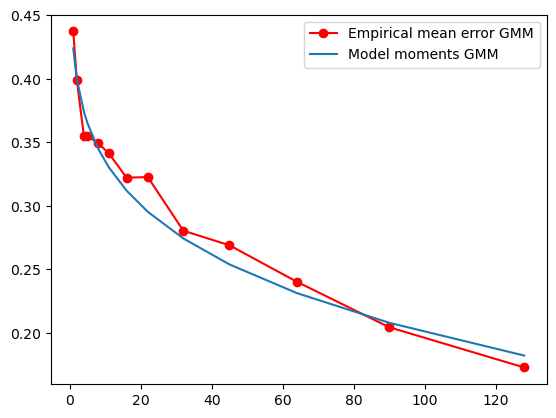

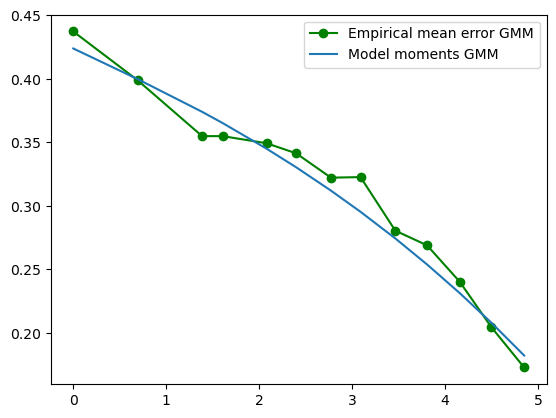

H =  0.09582658314987488 lambda2 = 0.024139309737131964 T =  3.7036956165499206 lsigma2 = 4.5399929762484854e-05 p-Value=  0.3674590252853475 J =  10.873488972193778 J_95 =  18.30703805327515
------------------------------------------------------


(0.09582658314987488,
 0.024139309737131964,
 3.7036956165499206,
 4.5399929762484854e-05,
 0.3674590252853475,
 10.873488972193778,
 18.30703805327515,
 [array([0.43724762, 0.39882897, 0.35490305, 0.35486232, 0.34929694,
         0.34138694, 0.32220359, 0.32264307, 0.28046026, 0.26897066,
         0.24025528, 0.20446792, 0.17281963]),
  array([0.42386763, 0.39974203, 0.37402486, 0.3650893 , 0.34503216,
         0.33040414, 0.31202255, 0.29533395, 0.27435198, 0.25390837,
         0.23133768, 0.20799112, 0.18221461]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [39]:
# Synthetic index construction from those stocks
weights = [0.25,0.25,0.5]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(Stocks_test_synthindex_symbols,weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

#### Conclusion : No surprise again !
#### - Single assets have very low estimated hurst index than the synthetic index constructed above

Checking the statistical correlation between stocks 

In [6]:
Stocks_test_synthindex_symbols = ["TSLA","AAPL","NVDA"]
logvol_synthesis_yf_check = realized_vol_data_obj_yf.LogVolSynthesisOverAssets(Stocks_test_synthindex_symbols)
logvol_synthesis_yf_check

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'TSLA': array([-3.15741392, -3.40710533, -3.74088051, ..., -7.47758075,
        -7.01067274, -5.77955743]),
 'AAPL': array([-11.57375652, -12.94782852, -12.79575501, ...,  -8.2770449 ,
         -7.86799338,  -8.81854766]),
 'NVDA': array([-3.69682044, -5.12301607, -5.32765212, ..., -7.5784237 ,
        -6.90258307, -8.38881265])}

In [8]:
minlength = min(min(len(logvol_synthesis_yf_check['TSLA']),len(logvol_synthesis_yf_check['AAPL'])),len(logvol_synthesis_yf_check['NVDA']))
np.corrcoef([logvol_synthesis_yf_check['TSLA'][:minlength],logvol_synthesis_yf_check['AAPL'][:minlength],logvol_synthesis_yf_check['NVDA'][:minlength]])

array([[ 1.        , -0.06368572,  0.145708  ],
       [-0.06368572,  1.        , -0.13849021],
       [ 0.145708  , -0.13849021,  1.        ]])

#### - The correlation of assets forming the index max impact the estimated H of the index, let's check this : 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
res =        fun: 0.0018524630055924197
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.19452714e-06,  1.65666093e-07,  4.95953322e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 636
      nit: 44
     njev: 159
   status: 0
  success: True
        x: array([-6.77124918, -2.77102675,  0.01241906])
*******************************
Objective function value after calibration =  0.0042660592302676825


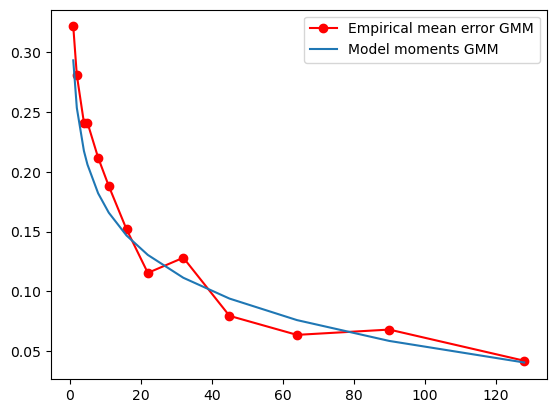

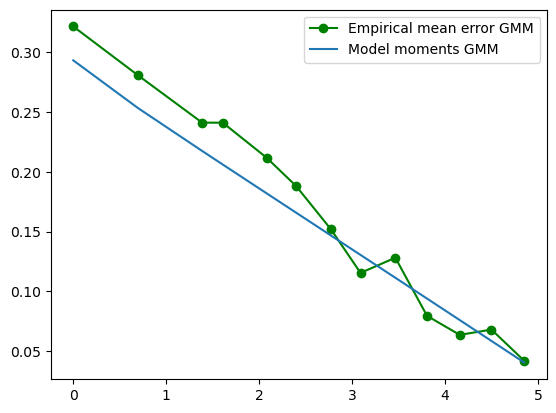

H =  0.0011531144035181868 lambda2 = 0.05052707508360463 T =  1.0130971023417756 lsigma2 = 4.5399929762484854e-05 p-Value=  0.20797128284061875 J =  13.288774504103126 J_95 =  18.30703805327515
------------------------------------------------------


(0.0011531144035181868,
 0.05052707508360463,
 1.0130971023417756,
 4.5399929762484854e-05,
 0.20797128284061875,
 13.288774504103126,
 18.30703805327515,
 [array([0.32168425, 0.28102874, 0.24123169, 0.24114375, 0.21193627,
         0.1881609 , 0.15194926, 0.11546106, 0.12816762, 0.07952546,
         0.06360155, 0.06803648, 0.04196408]),
  array([0.29334805, 0.25358773, 0.21755489, 0.20611798, 0.1821096 ,
         0.16586713, 0.14675924, 0.13051429, 0.11138973, 0.09397644,
         0.07597297, 0.05853336, 0.04050188]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [10]:
weights = [0.5,0.5]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(['TSLA','AAPL'],weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

In [25]:
minlength = min(min(len(logvol_synthesis_yf_check['TSLA']),len(logvol_synthesis_yf_check['AAPL'])),min(len(logvol_synthesis_yf['AMZN']),len(logvol_synthesis_yf_check['NVDA'])))
np.corrcoef([logvol_synthesis_yf_check['TSLA'][:minlength],logvol_synthesis_yf_check['AAPL'][:minlength],logvol_synthesis_yf_check['NVDA'][:minlength],logvol_synthesis_yf['AMZN'][:minlength]])

array([[ 1.        , -0.06368572,  0.145708  ,  0.06938077],
       [-0.06368572,  1.        , -0.13849021, -0.18083997],
       [ 0.145708  , -0.13849021,  1.        ,  0.26726368],
       [ 0.06938077, -0.18083997,  0.26726368,  1.        ]])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
res =        fun: 0.0019961166390402526
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.19106071e-04, -5.53983945e-07,  3.72000174e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1204
      nit: 59
     njev: 301
   status: 2
  success: False
        x: array([-6.62625376, -2.67173501,  0.01591778])
*******************************
Objective function value after calibration =  0.0035753692768378835


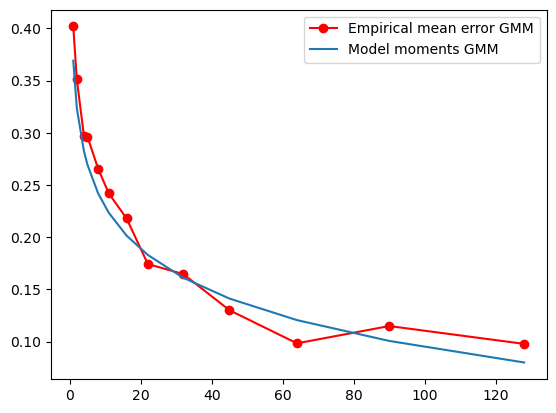

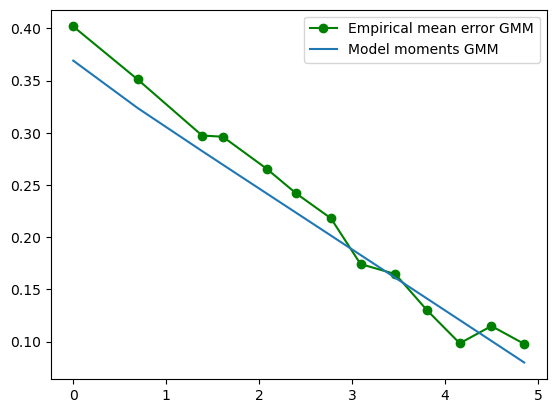

H =  0.0013258534127126443 lambda2 = 0.057720243275886034 T =  1.016611383879911 lsigma2 = 4.5399929762484854e-05 p-Value=  0.3466502988535683 J =  11.140850666626845 J_95 =  18.30703805327515
------------------------------------------------------


(0.0013258534127126443,
 0.057720243275886034,
 1.016611383879911,
 4.5399929762484854e-05,
 0.3466502988535683,
 11.140850666626845,
 18.30703805327515,
 [array([0.40182108, 0.3510467 , 0.29734952, 0.29620067, 0.26562564,
         0.24191374, 0.21801811, 0.17425172, 0.16459413, 0.12995843,
         0.09827351, 0.11482572, 0.0977423 ]),
  array([0.36910216, 0.32366376, 0.28247269, 0.26939635, 0.24194315,
         0.22336759, 0.20151239, 0.18292953, 0.16105002, 0.14112582,
         0.12052387, 0.10056479, 0.07992585]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [28]:
weights = [0.15,0.65,0.1,0.1]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(['AMZN','TSLA','NVDA','AAPL'],weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
res =        fun: 0.0007830681392525793
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([8.24275549e-07, 3.92914870e-08, 7.09068225e-09])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 556
      nit: 53
     njev: 139
   status: 2
  success: False
        x: array([-2.00095327, -3.76598439,  1.42539344])
*******************************
Objective function value after calibration =  0.003873653949091483


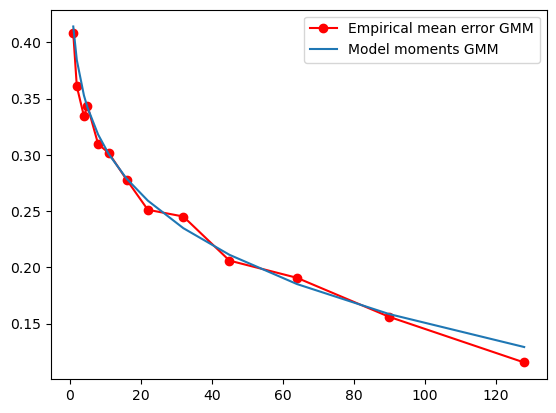

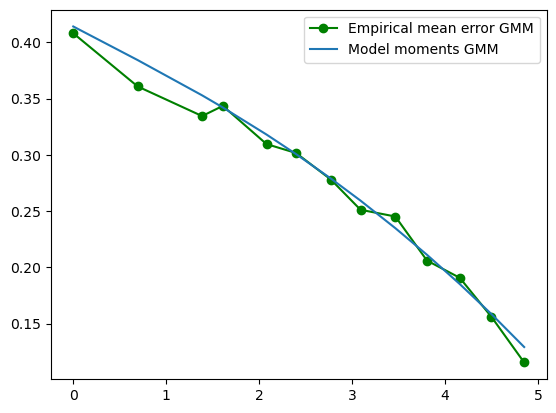

H =  0.08624130872681124 lambda2 = 0.03068844678283682 T =  2.9101359141138436 lsigma2 = 4.5399929762484854e-05 p-Value=  0.28037876549091706 J =  12.07030570536906 J_95 =  18.30703805327515
------------------------------------------------------


(0.08624130872681124,
 0.03068844678283682,
 2.9101359141138436,
 4.5399929762484854e-05,
 0.28037876549091706,
 12.07030570536906,
 18.30703805327515,
 [array([0.40796802, 0.36071385, 0.33441149, 0.34345485, 0.30953256,
         0.30156455, 0.277951  , 0.25116393, 0.24515592, 0.20598692,
         0.19070604, 0.15600959, 0.11548023]),
  array([0.41400242, 0.38414184, 0.35281994, 0.34203519, 0.31799134,
         0.30058825, 0.27886509, 0.25927332, 0.23480483, 0.21112704,
         0.18515888, 0.15847588, 0.12921084]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [29]:
weights = [0.15,0.65,0.1,0.1]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(['AMZN','AAPL','NVDA','TSLA'],weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

#### => The weights and the correlations impact together H estimate of the index     
#### not necessary the dimension (number of stocks)

# Mutlidimensional S-fbm model generation - independant marginals 

- ### Sanity check: 1 dimensional S fbm

In [40]:
size = 4000
H=0.09
S_fbm_model = Sfbm(H,0.068970 ,2**14) #T=0.732075
Sfbmcorrelation = S_fbm_model.SfbmCorrelation(size)
S_fbm_model_generation_example = S_fbm_model.GenerateSfbm(size)
S_fbm_model_logvolgeneration_example = S_fbm_model.GeneratelogVol(size)
S_fbm_model_logvolgeneration_example_qv = S_fbm_model_logvolgeneration_example[0]
print(S_fbm_model_logvolgeneration_example_qv)

[0.54820413 0.88899851 0.82739873 ... 0.15251036 0.64448572 0.07736817]


*******************************
res =        fun: 0.012990994132209353
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.18952927e-02, -1.65006898e-06,  6.49885524e-02])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1032
      nit: 85
     njev: 258
   status: 2
  success: False
        x: array([-2.72269882, -2.32873729,  0.51276449])
*******************************
Objective function value after calibration =  0.007461822582745558


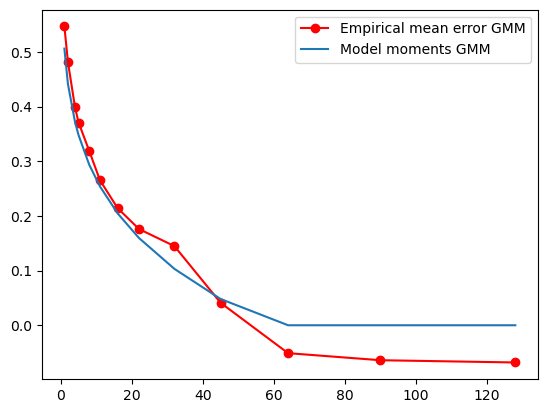

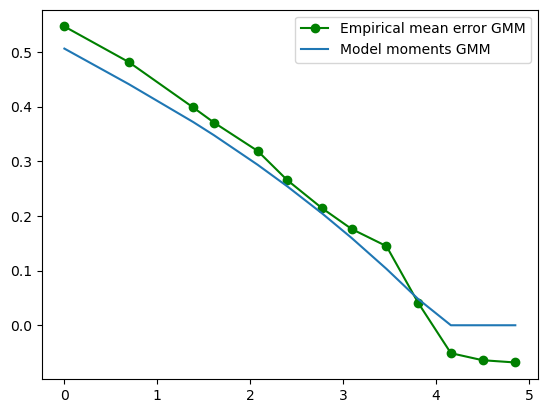

H =  0.0957472143631161 lambda2 = 0.06510963112911652 T =  2.1870918783557913 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0009098641390290125 J =  29.83982850839949 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_param1d =  (0.0957472143631161, 0.06510963112911652, 2.1870918783557913, 4.5399929762484854e-05, 0.0009098641390290125, 29.83982850839949, 18.30703805327515, [array([ 0.54666958,  0.48153327,  0.39842951,  0.37088486,  0.31895584,
        0.26555785,  0.21416824,  0.1761195 ,  0.14471126,  0.04109845,
       -0.05106   , -0.06396659, -0.06810236]), array([0.50620305, 0.44114499, 0.3718043 , 0.3477133 , 0.29364074,
       0.25420714, 0.20465756, 0.15967411, 0.10312116, 0.04802238,
       0.        , 0.        , 0.        ]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [41]:
GMM_1d = GMM()
index_estimatedGMM_param1d = GMM_1d.ComputeParamsGMM(S_fbm_model_logvolgeneration_example_qv,5,LagSignal=np.array([1, 2, 4, 5, 8, 11, 16, 22, 32, 45, 64, 90, 128]),
                         GMM_Method=1)
print("index_estimatedGMM_param1d = ", index_estimatedGMM_param1d)

- ### d dimensional S fbm

- d=1 

Recheck, for rough 

*******************************
res =        fun: 0.1063543170763333
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.84183789e-04, 7.32608423e-06, 2.89351878e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 700
      nit: 87
     njev: 175
   status: 2
  success: False
        x: array([-1.95958443, -1.12781976,  1.50686206])
*******************************
Objective function value after calibration =  0.0030108643548747305


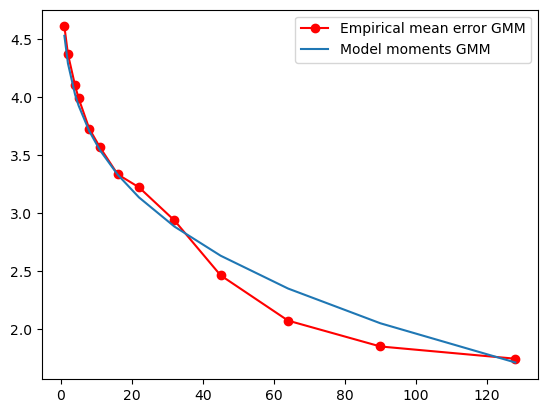

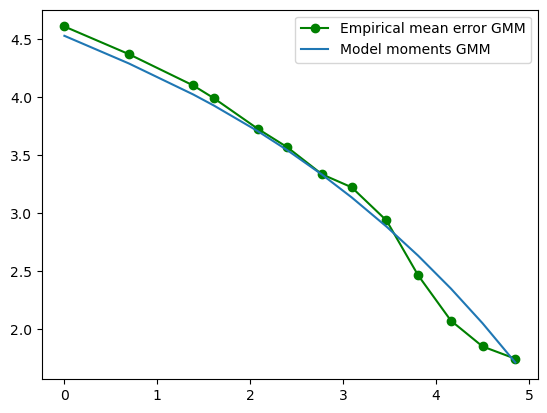

H =  0.12740735912369494 lambda2 = 0.2172551926356165 T =  4.938658039440489 lsigma2 = 4.5399929762484854e-05 p-Value=  0.28235868543698384 J =  12.040446555144047 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_paramSfbms =  (0.12740735912369494, 0.2172551926356165, 4.938658039440489, 4.5399929762484854e-05, 0.28235868543698384, 12.040446555144047, 18.30703805327515, [array([4.6098122 , 4.37136095, 4.10080466, 3.99055916, 3.72797032,
       3.56825002, 3.33427712, 3.22253389, 2.93624273, 2.46290443,
       2.07223115, 1.84922288, 1.74362068]), array([4.52930528, 4.29100563, 4.02326976, 3.92743715, 3.70744867,
       3.54295231, 3.33164508, 3.1355552 , 2.88354581, 2.63239469,
       2.34897172, 2.04931976, 1.71115412]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [42]:
dimension = 1
Hs = [0.15 for i in range(dimension)]
weights = np.random.randint(1, 10, dimension)

weights = weights / np.sum(weights)

#Sfbms = [Sfbm(H=Hs[i]) for i in range(dimension)]
Sfbms = [Sfbm(Hs[i], 0.02,2**14) for i in range(dimension)]  # 0.068970
MultidimensionalSfbms = MultidimensionalSfbm(Sfbms)
Sfbms_generation_example = MultidimensionalSfbms.GenerateMultidimensionalSfbm(4000)
index_builder_Sfbms = MultidimensionalSfbms.Index_Builder(weights, Sfbms_generation_example,'mrm and mrw')
log_vol_index_generation_direct_Sfbms = MultidimensionalSfbms.GeneratelogVolMultidimSfbm_Index(weights,'quadratic variation estimate',4000)

GMM_index = GMM()
index_estimatedGMM_paramSfbms = GMM_index.ComputeParamsGMM(log_vol_index_generation_direct_Sfbms,10)
print("index_estimatedGMM_paramSfbms = ", index_estimatedGMM_paramSfbms)

Checking robustness

*******************************
res =        fun: 0.22489747612253408
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.10782522e-07, 1.83186800e-07, 1.09912080e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 552
      nit: 39
     njev: 138
   status: 2
  success: False
        x: array([-1.52556519, -1.37243212,  1.39786286])
*******************************
Objective function value after calibration =  0.006787558837364659
H =  0.13934143446621042 lambda2 = 0.24798767196944688 T =  3.07403029801785 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0024716343632523764 J =  27.143447790621273 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.049456015458431465
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.83516268e-05, 1.04985464e-06, 4.73371340e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 360
      nit: 32
     njev: 90
   s

Objective function value after calibration =  0.005146047526253667
H =  0.15876522660724815 lambda2 = 0.20232840583920111 T =  3.899873625648358 lsigma2 = 4.5399929762484854e-05 p-Value=  0.024227859675078536 J =  20.579044057488417 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.16048820465794564
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.15025785e-06, -1.25455201e-06,  1.74582570e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1036
      nit: 139
     njev: 259
   status: 2
  success: False
        x: array([-2.13298319, -0.96882172,  0.85577282])
*******************************
Objective function value after calibration =  0.006095330911983617
H =  0.1011594084456794 lambda2 = 0.262187951057211 T =  2.3060444933791397 lsigma2 = 4.5399929762484854e-05 p-Value=  0.006664337221418003 J =  24.375228317017196 J_95 =  18.30703805327515
-----------------------

*******************************
res =        fun: 0.2965561794536066
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.01284409, -0.00197691,  1.84151298])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 828
      nit: 25
     njev: 207
   status: 2
  success: False
        x: array([-1.99134332, -0.71791149,  0.99908326])
*******************************
Objective function value after calibration =  0.005153379031417072
H =  0.15916291351469602 lambda2 = 0.22208198168284798 T =  3.7579570879883737 lsigma2 = 4.5399929762484854e-05 p-Value=  0.02399619672859323 J =  20.608362746619427 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.024194740660899258
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.43034890e-05, -3.60822485e-08, -5.86336538e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 396
      nit: 37
     njev: 99
   status: 

Objective function value after calibration =  0.0062447656356504795
H =  0.06967067731204944 lambda2 = 0.30237749445114626 T =  1.9019323259826164 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0053972674611040185 J =  24.972817776966266 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0433567998950362
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.83106873e-07,  1.08107968e-06,  1.22818423e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 376
      nit: 54
     njev: 94
   status: 0
  success: True
        x: array([-1.69911451, -1.35442163,  1.30814465])
*******************************
Objective function value after calibration =  0.0016939601407840472
H =  0.16063232999726176 lambda2 = 0.20228075073126064 T =  3.827030775296404 lsigma2 = 4.5399929762484854e-05 p-Value=  0.7465809849007546 J =  6.774146602984655 J_95 =  18.30703805327515
--------

*******************************
res =        fun: 0.2326001192133243
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.41788839e-06, 3.33066909e-08, 9.99200728e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 868
      nit: 104
     njev: 217
   status: 2
  success: False
        x: array([-1.33351474, -1.63235924,  1.61916591])
*******************************
Objective function value after calibration =  0.0056308929036171605
H =  0.15150327393050153 lambda2 = 0.22696320810965898 T =  3.392149924308662 lsigma2 = 4.5399929762484854e-05 p-Value=  0.012672823479688431 J =  22.517940721565026 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.058572004902391145
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.52499542e-04, -4.87873628e-05,  2.80470090e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 356
      nit: 27
     njev: 89


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.004380750748769414
H =  0.12501934131194806 lambda2 = 0.24821049736414183 T =  3.1786405988577697 lsigma2 = 4.5399929762484854e-05 p-Value=  0.06364738811554958 J =  17.518622244328885 J_95 =  18.30703805327515
------------------------------------------------------


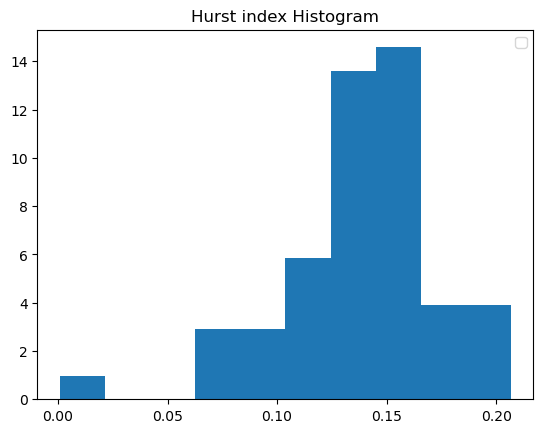

In [43]:
Number_indices = 50
dimension = 1
H = 0.15
Hs = [H for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([Sfbm(Hs[i],0.02 ,2**14) for i in range(dimension)])


MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

keys = ['Index trajectory' for i in range(Number_indices)]
log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,8,'direct',keys)
Index_trajectories_synthesis = log_vol_indices_dic[1]
GMM_index_trajectories_obj = GMM()

GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram')

Recheck, for multifractal

*******************************
res =        fun: 0.014197948549501637
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.18401687e-07,  6.59194925e-09,  1.69655956e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1236
      nit: 157
     njev: 309
   status: 2
  success: False
        x: array([-2.96537425, -2.18009076,  0.38615459])
*******************************
Objective function value after calibration =  0.007717493551051545
H =  0.019980164465038704 lambda2 = 0.1088522237386197 T =  1.1698959216871292 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0006182558356704014 J =  30.862256710655185 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0027674660000457756
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.28766660e-07, 6.90853629e-08, 9.03357246e-08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 876
      

Objective function value after calibration =  0.0030019153277859767
H =  0.03563239041972934 lambda2 = 0.11538574074412046 T =  1.3418928556611533 lsigma2 = 4.5399929762484854e-05 p-Value=  0.2847447852342179 J =  12.004659395816121 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.002286045376716337
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.88988713e-04,  1.59283612e-05,  3.23075858e-02])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 524
      nit: 32
     njev: 131
   status: 0
  success: True
        x: array([-7.05426834, -1.77071944,  0.00717794])
*******************************
Objective function value after calibration =  0.0016697970917079017
H =  0.0008628851785209913 lambda2 = 0.13170166118837537 T =  1.0073245847071137 lsigma2 = 4.5399929762484854e-05 p-Value=  0.7554979428600326 J =  6.677518569739899 J_95 =  18.30703805327515
-----

*******************************
res =        fun: 0.00336509251313791
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.01414711e-04, 2.31117210e-06, 9.96462721e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1176
      nit: 42
     njev: 294
   status: 0
  success: True
        x: array([-7.17717280e+00, -1.80272013e+00,  6.78397153e-03])
*******************************
Objective function value after calibration =  0.0030340283216276805
H =  0.0007633935246916562 lambda2 = 0.1282134174732907 T =  1.0068971509071385 lsigma2 = 4.5399929762484854e-05 p-Value=  0.2762487573523886 J =  12.133079258189094 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.002094482051119194
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.34890234e-06, 7.37257482e-09, 3.92914865e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1124
 

Objective function value after calibration =  0.0042708969028318515
H =  0.0005788209116563622 lambda2 = 0.13820903984341854 T =  1.0050881865350556 lsigma2 = 4.5399929762484854e-05 p-Value=  0.07262722436531993 J =  17.079316714424575 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0038236114636753843
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.19451065e-05, -9.75304912e-07,  5.26571365e-04])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 468
      nit: 36
     njev: 117
   status: 2
  success: False
        x: array([-7.26348903e+00, -1.68580254e+00,  5.59633939e-03])
*******************************
Objective function value after calibration =  0.003471631706584378
H =  0.0007003084457754408 lambda2 = 0.1351865729844677 T =  1.0057367820698069 lsigma2 = 4.5399929762484854e-05 p-Value=  0.17839296705945357 J =  13.883055194630927 J_95 =  18.30703805327515
-----

*******************************
res =        fun: 0.0015882880910693873
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.95689647e-05, 2.24473219e-07, 7.61376639e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 812
      nit: 46
     njev: 203
   status: 2
  success: False
        x: array([-5.70355735, -1.85166676,  0.033805  ])
*******************************
Objective function value after calibration =  0.00043760983851159625
H =  0.023736673984617596 lambda2 = 0.11697147958200826 T =  1.2677430468528612 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9979219701746214 J =  1.7500017442078735 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.002893779178863863
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.29957895e-05, -1.07648266e-06,  5.12964497e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 424
      ni

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.0018498160436944155
H =  0.07328053626720572 lambda2 = 0.10392034213325947 T =  1.7679801210869033 lsigma2 = 4.5399929762484854e-05 p-Value=  0.6874689521351819 J =  7.397414358734608 J_95 =  18.30703805327515
------------------------------------------------------
////////////////////////////////////////////////////////////
Calibrated_Hurst_indices, size_calibrated_hursts =  [0.01998016 0.07091935 0.00088394 0.04694061 0.00810196 0.0100992
 0.03723488 0.00123909 0.00093099 0.09529529 0.08568509 0.03563239
 0.00086289 0.00054052 0.02791388 0.00057341 0.00076075 0.01300856
 0.03333453 0.00196149 0.04364544 0.00080627 0.04496465 0.00076339
 0.07250128 0.07343982 0.06288131 0.00077964 0.08035135 0.00068965
 0.00065783 0.00057019 0.00055511 0.00084672 0.00057882 0.00070031
 0.0009898  0.000777   0.00181166 0.05748297 0.0403142  0.04052543
 0.04625779 0.07451734 0.00063518 0.0009861  0.02373667 0.00067693
 0.00065741 0.07328054] 50
////////////

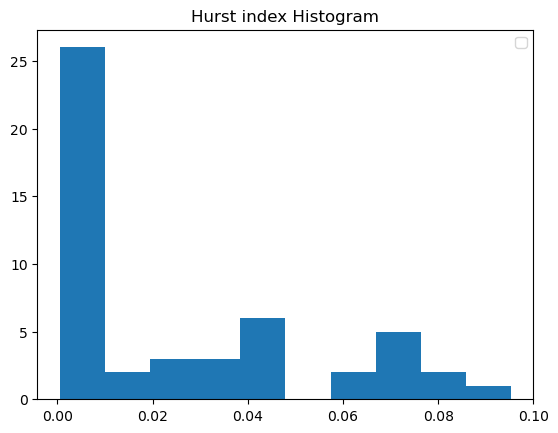

In [30]:
Number_indices = 50
dimension = 1
H = 0.05
Hs = [H for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([Sfbm(Hs[i],0.02 ,2**14) for i in range(dimension)])


MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

keys = ['Index trajectory' for i in range(Number_indices)]
log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,8,'direct',keys)
Index_trajectories_synthesis = log_vol_indices_dic[1]
GMM_index_trajectories_obj = GMM()

GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram',"",10)

Idea: construct an estimator (of les variance (divided by Num)) as the mean of the Hs over the multiple robustness steps above => similar to cross validation

#### Conclusion : H estimation is robust in some sense for 1D Sfbm models =>coherent with the asymptotic normality in "A GMM approach to estimate the roughness of stochastic volatility"
#### Difficult to capture multifractal models H->0 =>coherent with  "A GMM approach to estimate the roughness of stochastic volatility"

- d>1

*******************************
res =        fun: 0.17759410338537157
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.14611654e-03, -4.50472990e-06, -5.57887067e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 952
      nit: 118
     njev: 238
   status: 2
  success: False
        x: array([-3.19577873,  0.94236205,  0.73619528])
*******************************
Objective function value after calibration =  0.0016547797057826416


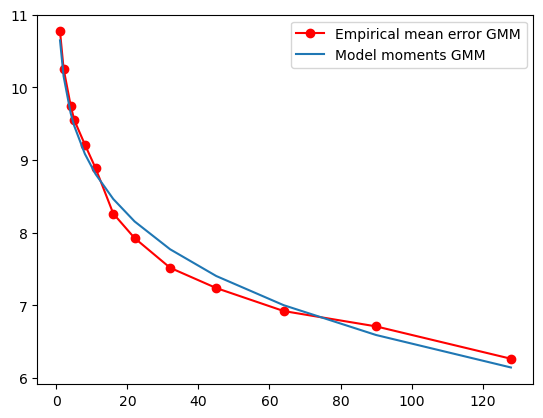

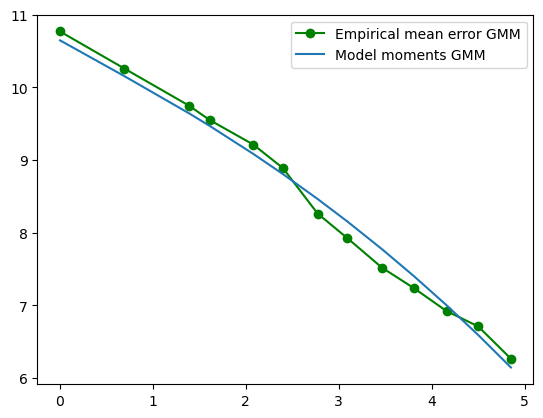

H =  0.07764962262450477 lambda2 = 0.518415589675762 T =  3.6799189954803233 lsigma2 = 4.5399929762484854e-05 p-Value=  0.7609974783539604 J =  6.617464043424784 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_paramSfbms =  (0.07764962262450477, 0.518415589675762, 3.6799189954803233, 4.5399929762484854e-05, 0.7609974783539604, 6.617464043424784, 18.30703805327515, [array([10.76901614, 10.2587856 ,  9.75005217,  9.55186878,  9.21345407,
        8.89052127,  8.26370392,  7.92709696,  7.51864277,  7.23970305,
        6.92329316,  6.71237387,  6.26722464]), array([10.64696051, 10.15422853,  9.64482161,  9.47084533,  9.08533266,
        8.80818802,  8.464311  ,  8.15601599,  7.77327302,  7.40516758,
        7.0038534 ,  6.59394001,  6.14703081]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [31]:
dimension = 2
Hs = [0.12 for i in range(dimension)]
weights = np.random.randint(1, 10, dimension)

weights = weights / np.sum(weights)

#Sfbms = [Sfbm(H=Hs[i]) for i in range(dimension)] 
Sfbms = [Sfbm(Hs[i], 0.068970 ,2**14) for i in range(dimension)]
MultidimensionalSfbms = MultidimensionalSfbm(Sfbms)
Sfbms_generation_example = MultidimensionalSfbms.GenerateMultidimensionalSfbm(4000)
index_builder_Sfbms = MultidimensionalSfbms.Index_Builder(weights, Sfbms_generation_example,'mrm and mrw')
log_vol_index_generation_direct_Sfbms = MultidimensionalSfbms.GeneratelogVolMultidimSfbm_Index(weights,'quadratic variation estimate',4000)

GMM_index = GMM()
index_estimatedGMM_paramSfbms = GMM_index.ComputeParamsGMM(log_vol_index_generation_direct_Sfbms,10)
print("index_estimatedGMM_paramSfbms = ", index_estimatedGMM_paramSfbms)

####  The GMM calibration is aborted du to a small gradient norm (stopping condition). 
#### Let's plot the Hat{H} distribution over multiple index trajectories :  Rough independant processes 

*******************************
res =        fun: 0.41405793328535223
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([7.28500598e-04, 2.92543769e-06, 3.48665543e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 308
      nit: 36
     njev: 77
   status: 0
  success: True
        x: array([-1.69748308,  1.33142617,  1.47530723])
*******************************
Objective function value after calibration =  0.001219467788928058
H =  0.12999108425414968 lambda2 = 0.9593711782802135 T =  3.5305030614462307 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8992639200789863 J =  4.876651687923194 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 2.7819079132582036
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00464024,  0.        ,  0.00968217])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 432
      nit: 67


Objective function value after calibration =  0.0012351965550122075
H =  0.149885995689477 lambda2 = 0.7800303557176355 T =  4.105988976010598 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8951792829963555 J =  4.939551023489885 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.21128647005055098
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.50937597e-04, -5.68156630e-06,  1.14075416e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 384
      nit: 32
     njev: 96
   status: 2
  success: False
        x: array([-1.35540063,  0.74450866,  1.62248642])
*******************************
Objective function value after calibration =  0.0007357845330503334
H =  0.22305984820180283 lambda2 = 0.5656882421276642 T =  5.927463805380494 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9827471844277246 J =  2.9424023476682835 J_95 =  18.30703805327515
-------------------------------

*******************************
res =        fun: 2.8946433046001006
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.77857756e-03, 0.00000000e+00, 1.74971150e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1076
      nit: 111
     njev: 269
   status: 2
  success: False
        x: array([-2.00278044, 18.95624108,  1.34768646])
*******************************
Objective function value after calibration =  0.001977250410482435
H =  0.11833699253483695 lambda2 = 0.999999994146588 T =  3.8011511481808404 lsigma2 = 4.5399929762484854e-05 p-Value=  0.6379182869178684 J =  7.907024391186904 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 1.2576280150445278
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.03910214e-03, -3.06421555e-06,  1.88737915e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 344
      nit: 31
     njev: 86
   sta

Objective function value after calibration =  0.0019456125036503924
H =  0.17524990375245858 lambda2 = 0.7089662707908228 T =  5.632633888508052 lsigma2 = 4.5399929762484854e-05 p-Value=  0.6502671076476324 J =  7.78050440209796 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 1.4792968286772947
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([6.70685733e-04, 0.00000000e+00, 5.45785636e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 588
      nit: 63
     njev: 147
   status: 0
  success: True
        x: array([-2.16848744, 18.78793758,  0.91059249])
*******************************
Objective function value after calibration =  0.003459208114660076
H =  0.08965952743681271 lambda2 = 0.9999999930736827 T =  2.234320063711071 lsigma2 = 4.5399929762484854e-05 p-Value=  0.18072854586625034 J =  13.833373250525645 J_95 =  18.30703805327515
-----------------

*******************************
res =        fun: 2.339549734166108
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.16162138, -0.00685931,  3.82922421])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 864
      nit: 49
     njev: 216
   status: 2
  success: False
        x: array([-1.92195612,  3.12478853,  1.14874179])
*******************************
Objective function value after calibration =  0.0035696400662533277
H =  0.11186851409049614 lambda2 = 0.9999996346427307 T =  2.80977104492377 lsigma2 = 4.5399929762484854e-05 p-Value=  0.1608139002630536 J =  14.274990624874402 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 1.8036057567109394
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.15847341e-03, -1.77635669e-07, -3.09885453e-04])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 464
      nit: 60
     njev: 116
   status: 2
  s

*******************************
res =        fun: 0.41405793328535223
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([7.28500598e-04, 2.92543769e-06, 3.48665543e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 308
      nit: 36
     njev: 77
   status: 0
  success: True
        x: array([-1.69748308,  1.33142617,  1.47530723])
*******************************
Objective function value after calibration =  0.001219467788928058
H =  0.12999108425414968 lambda2 = 0.9593711782802135 T =  3.5305030614462307 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8992639200789863 J =  4.876651687923194 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 2.7819079132582036
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00464024,  0.        ,  0.00968217])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 432
      nit: 67


Objective function value after calibration =  0.0012351965550122075
H =  0.149885995689477 lambda2 = 0.7800303557176355 T =  4.105988976010598 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8951792829963555 J =  4.939551023489885 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.21128647005055098
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.50937597e-04, -5.68156630e-06,  1.14075416e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 384
      nit: 32
     njev: 96
   status: 2
  success: False
        x: array([-1.35540063,  0.74450866,  1.62248642])
*******************************
Objective function value after calibration =  0.0007357845330503334
H =  0.22305984820180283 lambda2 = 0.5656882421276642 T =  5.927463805380494 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9827471844277246 J =  2.9424023476682835 J_95 =  18.30703805327515
-------------------------------

*******************************
res =        fun: 2.8946433046001006
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.77857756e-03, 0.00000000e+00, 1.74971150e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1076
      nit: 111
     njev: 269
   status: 2
  success: False
        x: array([-2.00278044, 18.95624108,  1.34768646])
*******************************
Objective function value after calibration =  0.001977250410482435
H =  0.11833699253483695 lambda2 = 0.999999994146588 T =  3.8011511481808404 lsigma2 = 4.5399929762484854e-05 p-Value=  0.6379182869178684 J =  7.907024391186904 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 1.2576280150445278
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.03910214e-03, -3.06421555e-06,  1.88737915e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 344
      nit: 31
     njev: 86
   sta

Objective function value after calibration =  0.0019456125036503924
H =  0.17524990375245858 lambda2 = 0.7089662707908228 T =  5.632633888508052 lsigma2 = 4.5399929762484854e-05 p-Value=  0.6502671076476324 J =  7.78050440209796 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 1.4792968286772947
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([6.70685733e-04, 0.00000000e+00, 5.45785636e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 588
      nit: 63
     njev: 147
   status: 0
  success: True
        x: array([-2.16848744, 18.78793758,  0.91059249])
*******************************
Objective function value after calibration =  0.003459208114660076
H =  0.08965952743681271 lambda2 = 0.9999999930736827 T =  2.234320063711071 lsigma2 = 4.5399929762484854e-05 p-Value=  0.18072854586625034 J =  13.833373250525645 J_95 =  18.30703805327515
-----------------

*******************************
res =        fun: 2.339549734166108
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.16162138, -0.00685931,  3.82922421])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 864
      nit: 49
     njev: 216
   status: 2
  success: False
        x: array([-1.92195612,  3.12478853,  1.14874179])
*******************************
Objective function value after calibration =  0.0035696400662533277
H =  0.11186851409049614 lambda2 = 0.9999996346427307 T =  2.80977104492377 lsigma2 = 4.5399929762484854e-05 p-Value=  0.1608139002630536 J =  14.274990624874402 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 1.8036057567109394
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.15847341e-03, -1.77635669e-07, -3.09885453e-04])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 464
      nit: 60
     njev: 116
   status: 2
  s

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.002137838349753916
H =  0.15340750372628287 lambda2 = 0.7987066228772726 T =  3.9773149158506236 lsigma2 = 4.5399929762484854e-05 p-Value=  0.5753502570356528 J =  8.549215560660945 J_95 =  18.30703805327515
------------------------------------------------------
////////////////////////////////////////////////////////////
Calibrated_Hurst_indices, size_calibrated_hursts =  [1.29991084e-01 1.11382472e-01 8.96521046e-02 1.02804869e-01
 1.49593669e-01 1.43065482e-01 1.50588631e-01 1.48991817e-01
 1.68400822e-01 1.22904204e-01 1.33874092e-01 1.49885996e-01
 2.23059848e-01 9.44425392e-02 9.67577192e-02 1.55742247e-01
 1.85208416e-01 1.06711091e-01 1.23872184e-01 1.73120718e-01
 1.18739895e-01 1.06663376e-01 8.63407158e-02 1.18336993e-01
 1.89813137e-01 1.62902084e-01 1.52167624e-01 1.34467984e-01
 1.47687288e-01 4.14865435e-05 8.30167714e-02 1.81069022e-01
 1.10462614e-01 1.61884887e-01 1.75249904e-01 8.96595274e-02
 1.71082471e-01 1.15940019e

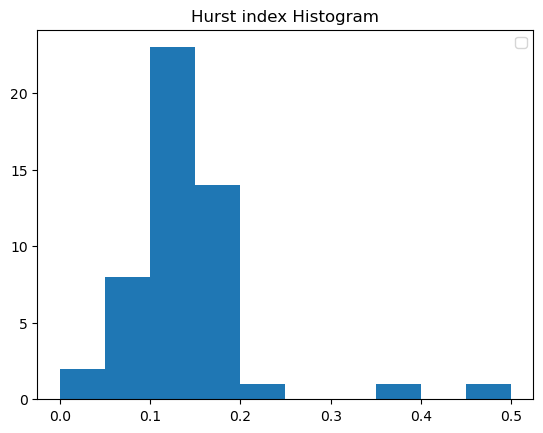

In [33]:
Number_indices = 50
dimension = 2
Hs = [0.15 for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    #Multiple_Sfbms.append([Sfbm(H=Hs[i]) for i in range(dimension)])
    Multiple_Sfbms.append([Sfbm(Hs[i],0.068970 ,2**14) for i in range(dimension)])


MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,4,'quadratic variation estimate',['Index trajectory' for i in range(Number_indices)])
Index_trajectories_synthesis = log_vol_indices_dic[1]

GMM_index_trajectories_obj = GMM()
print(GMM_index_trajectories_obj.MultipleGMMCalibrations(Index_trajectories_synthesis))

GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram')

#### Let's plot the Hat{H} distribution over multiple index trajectories :  Multifractal independant processes 

*******************************
res =        fun: 0.000411769862371268
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([-6.90446239, -6.39979312, -0.15674337])
*******************************
Objective function value after calibration =  0.0024484721976007987
H =  0.0010022927142928572 lambda2 = 0.0016591437113154864 T =  0.854923429823631 lsigma2 = 4.5399929762484854e-05 p-Value=  0.4589776909179071 J =  9.791440318205595 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0005533844230637284
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array(

Objective function value after calibration =  0.0024153522305689077
H =  0.0010020389745588692 lambda2 = 0.0016077372723290561 T =  0.871553130296662 lsigma2 = 4.5399929762484854e-05 p-Value=  0.4709027988140948 J =  9.658993570045062 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0005546675024724577
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([-6.90508655, -6.3426601 , -0.11051486])
*******************************
Objective function value after calibration =  0.0027697943188772995
H =  0.0010016679446941304 lambda2 = 0.0017565244546667476 T =  0.8953730224638322 lsigma2 = 4.5399929762484854e-05 p-Value=  0.3515962352016233 J =  11.076407481190321 J_95 =  18.30703805327515
------------------------------------------

Objective function value after calibration =  0.005111469585823765
H =  0.0010024417844165714 lambda2 = 0.0015785903444174134 T =  0.8462637606732044 lsigma2 = 4.5399929762484854e-05 p-Value=  0.02534885408300604 J =  20.440766873709237 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0006077799486099735
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([-6.90540424, -6.41953789, -0.08660191])
*******************************
Objective function value after calibration =  0.0035545479550824375
H =  0.0010013500984409633 lambda2 = 0.0016267583757282242 T =  0.9170420904604348 lsigma2 = 4.5399929762484854e-05 p-Value=  0.1634245410879028 J =  14.214637272374668 J_95 =  18.30703805327515
----------------------------------------

Objective function value after calibration =  0.002590990420326721
H =  0.0010026715520322154 lambda2 = 0.001626070971714393 T =  0.8318407927965465 lsigma2 = 4.5399929762484854e-05 p-Value=  0.40938128574277916 J =  10.361370690886558 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0007532547245019522
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([-6.9054305 , -6.40340241, -0.08430615])
*******************************
Objective function value after calibration =  0.004253130216373061
H =  0.0010013238257091728 lambda2 = 0.001653176069107676 T =  0.9191498163871588 lsigma2 = 4.5399929762484854e-05 p-Value=  0.07418123598598945 J =  17.008267735275872 J_95 =  18.30703805327515
------------------------------------------

Objective function value after calibration =  0.0025592313708509397
H =  0.0010021708514215775 lambda2 = 0.00163407530139553 T =  0.8630617123653818 lsigma2 = 4.5399929762484854e-05 p-Value=  0.420177859082132 J =  10.234366252032908 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0008217651872267045
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([-6.9048528 , -6.39362074, -0.12769592])
*******************************
Objective function value after calibration =  0.0048808058575053265
H =  0.0010019018844712282 lambda2 = 0.001669399102957758 T =  0.8801209649560908 lsigma2 = 4.5399929762484854e-05 p-Value=  0.03415195340592932 J =  19.5183426241638 J_95 =  18.30703805327515
---------------------------------------------

Objective function value after calibration =  0.003168595056396566
H =  0.0010019362177013382 lambda2 = 0.0016709509612082857 T =  0.8786743737835632 lsigma2 = 4.5399929762484854e-05 p-Value=  0.24264002127695683 J =  12.671211630529868 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.00038599516193428215
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([-6.90478345, -6.39949774, -0.13235624])
*******************************
Objective function value after calibration =  0.002365961397029809
H =  0.001001971298455331 lambda2 = 0.0016596330548954501 T =  0.8760288619741444 lsigma2 = 4.5399929762484854e-05 p-Value=  0.4889373735140434 J =  9.461479626722205 J_95 =  18.30703805327515
------------------------------------------

Objective function value after calibration =  0.003935806493974607
H =  0.0010027816232659385 lambda2 = 0.0017145666422458872 T =  0.8253526791967178 lsigma2 = 4.5399929762484854e-05 p-Value=  0.10734270393700426 J =  15.739290169404454 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0003563710225088925
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([-6.90598652, -6.8738745 , -0.04340695])
*******************************
Objective function value after calibration =  0.003652832723191087
H =  0.001000767782166048 lambda2 = 0.0010333922618649869 T =  0.9575216496817113 lsigma2 = 4.5399929762484854e-05 p-Value=  0.14703324895289271 J =  14.607678060041156 J_95 =  18.30703805327515
-----------------------------------------

Objective function value after calibration =  0.0026366058911206527
H =  0.0010028352897309839 lambda2 = 0.001695975211671002 T =  0.8216438173036027 lsigma2 = 4.5399929762484854e-05 p-Value=  0.394146591595565 J =  10.54378695859149 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0008673315212763674
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([-6.9051843 , -6.42860923, -0.10283814])
*******************************
Objective function value after calibration =  0.005999944518959447
H =  0.0010015701342407162 lambda2 = 0.0016120919129365256 T =  0.9022730045949149 lsigma2 = 4.5399929762484854e-05 p-Value=  0.007616922521959903 J =  23.993778131318827 J_95 =  18.30703805327515
------------------------------------------

Objective function value after calibration =  0.0008532808164657447
H =  0.0010021440313365184 lambda2 = 0.0016905302387867824 T =  0.8648390619148081 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9699935440650139 J =  3.412269985046513 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0003069549835948959
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([-6.90437888, -6.41619554, -0.16234281])
*******************************
Objective function value after calibration =  0.0020912339706963727
H =  0.0010023763410165456 lambda2 = 0.0016321957707617217 T =  0.8501497107194042 lsigma2 = 4.5399929762484854e-05 p-Value=  0.5934405117166629 J =  8.362844648814795 J_95 =  18.30703805327515
------------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.0048808058575053265
H =  0.0010019018844712282 lambda2 = 0.001669399102957758 T =  0.8801209649560908 lsigma2 = 4.5399929762484854e-05 p-Value=  0.03415195340592932 J =  19.5183426241638 J_95 =  18.30703805327515
------------------------------------------------------
////////////////////////////////////////////////////////////
Calibrated_Hurst_indices, size_calibrated_hursts =  [0.00100229 0.00100149 0.00100194 0.00100197 0.00100215 0.00100242
 0.00100248 0.00100155 0.00100162 0.00100201 0.00100311 0.00100184
 0.00100204 0.00100167 0.00100278 0.00100077 0.00100195 0.00100199
 0.00100136 0.00100242 0.00100248 0.00100212 0.00100235 0.00047706
 0.00100244 0.00100135 0.00100284 0.00100157 0.00100145 0.00100244
 0.00100199 0.00100134 0.00100161 0.00100138 0.00100378 0.00100229
 0.00100267 0.00100132 0.00100214 0.00100238 0.00100329 0.00100243
 0.00100199 0.00100196 0.00100291 0.00100102 0.00100173 0.00100155
 0.00100217 0.0010019 ] 50
////////

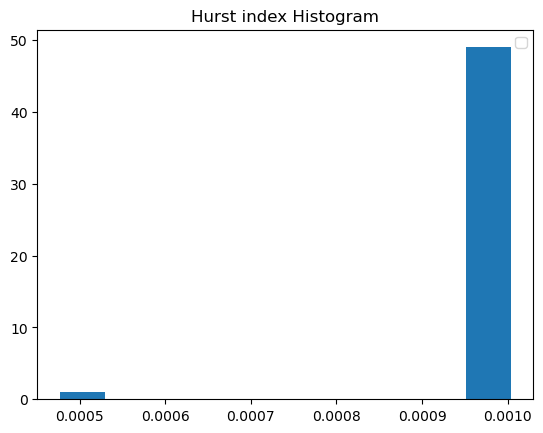

In [35]:
Number_indices = 50
dimension = 2
Hs = [0.01 for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([Sfbm(H=Hs[i]) for i in range(dimension)])


MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,4,'quadratic variation estimate',['Index trajectory' for i in range(Number_indices)])
Index_trajectories_synthesis = log_vol_indices_dic[1]

GMM_index_trajectories_obj = GMM()
print(GMM_index_trajectories_obj.MultipleGMMCalibrations(Index_trajectories_synthesis))

GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram')

# Mutlidimensional S-fbm model generation - correlated brownians dW_t